In [37]:
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib.colors as colors
import pickle
from astropy.io import fits 
%matplotlib widget 


science_list = np.genfromtxt('science/science.list', dtype=str)
science_test_list = science_list[:10]
science_frame_name = 'correct' + science_test_list[-1][:-5] + '.p'
science_corrected = pickle.load(open(science_frame_name, 'rb'))
# Открытие файла: 
# Вызывается функция open(), которая открывает файл, указанный в переменной 
# science_frame_name, в режиме чтения в двоичном формате ('rb')
# Загрузка данных:
# Затем используется pickle.load(), чтобы прочитать сериализованные 
# (сохранённые) данные из файла. Pickle — это библиотека Python, которая 
# позволяет сохранять и загружать объекты Python, превращая их в поток байтов и обратно
# Сохранение в переменную:
# Результат (десериализованный объект) сохраняется в переменной science_corrected
# Это объект, который ранее был сохранён в файл с помощью pickle
science00_fits = fits.open('./science/'+science_list[0])
science00_fits_00 = science00_fits[0]
science00_fits_00.header


SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                   16 / number of bits per data pixel                  
NAXIS   =                    2 / number of data axes                            
NAXIS1  =                  534 / length of data axis 1                          
NAXIS2  =                  180 / length of data axis 2                          
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
BZERO   =                32768 / offset data range to that of unsigned short    
BSCALE  =                    1 / default scaling factor                         
DATE    = '2011-03-09T22:44:40' / file creation date (YYYY-MM-DDThh:mm:ss UT)   
UTSTART = '2011-03-09T22:44:29.0' / UT date at start of exposure                
DATE-OBS= '09/03/11'        

### Identification of the target and reference stars


**FITS** (Flexible Image Transport System) — это формат файла, широко используемый в астрономии для хранения, передачи и обработки изображений и других научных данных. Основные особенности FITS:

vmin:  531.8    vmax: 66798.9


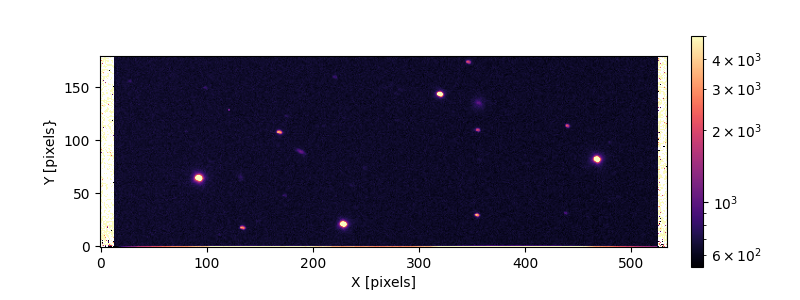

In [38]:
vmin = np.amin(science_corrected[:,100:400])
vmax = np.amax(science_corrected[:,100:400])

print('vmin:  {0:.1f}    vmax: {1:.1f}'.format(vmin, vmax))

vmax = 5000
fig, ax = plt.subplots(1, figsize=(8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['magma'], norm=colors.LogNorm(vmin=vmin, vmax=vmax), 
                 origin = 'lower')
# by changing the colors you can reproduce what you would see in ds9 because the color scale is logarithmic
plt.colorbar(im1,ax=ax, fraction=0.046, pad=0.04)
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels}')
plt.show()


In [39]:
x_target = 93
y_target = 64
#тут нужны координаты нашего таргета!

x_reference_01 = 230
y_reference_01 = 21

In [40]:
def make_circle_around_star(x_pos, y_pos, color = 'w', label='WRONG'):
    #from matplotlib.patches import Circle
    n, radii = 50, [9, 15]
    #: количество точек, используемых для построения круга. Чем больше значение n, 
    # тем более сглаженным будет круг
    # radii = [9, 15] : определяет радиусы двух кругов
    # В данном коде создаются два вложенных круга с радиусами 9 и 15 пикселей, 
    # чтобы получить замкнутую область
    
    theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta)) 
    ys = np.outer(radii, np.sin(theta))
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]

    ax.fill(np.ravel(xs) + x_pos, np.ravel(ys) + y_pos, 
            edgecolor=None, 
            facecolor=color,
            alpha=0.75,
            label=label)


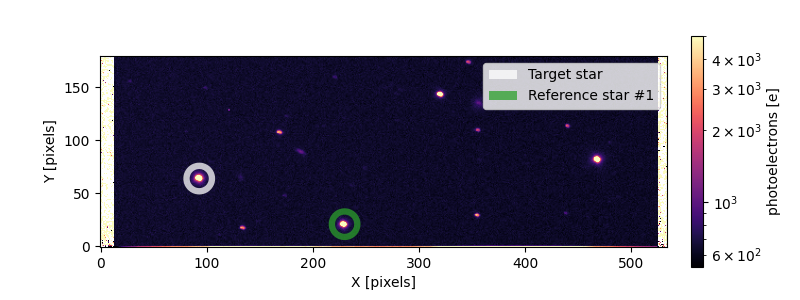

In [41]:
fig, ax = plt.subplots(1, figsize=(8,3))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['magma'], norm=colors.LogNorm(vmin=vmin, vmax=vmax), origin = 'lower')
# by changing the colors you can reproduce what you would see in ds9 because the color scale is logarithmic
plt.colorbar(im1,ax=ax, fraction=0.046, pad=0.04, label='photoelectrons [e]')

make_circle_around_star(x_target, y_target, label='Target star', color='w')
make_circle_around_star(x_reference_01, y_reference_01, label='Reference star #1', color='C2')

plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
ax.legend()
plt.show()

In [42]:
ylen, xlen  = np.shape(science_corrected)
# Определяются размеры двумерного массива science_corrected, 
# представляющего научное изображение
# ylen соответствует количеству строк 
# xlen — количеству столбцов изображения
print('Shape of our science frame: {0:d} x {1:d}'.format(xlen, ylen)) 
#ширина x высота

X_axis = np.arange(0, xlen, 1)
Y_axis = np.arange(0, ylen, 1)
# Создает одномерные массивы координат X_axis и Y_axis с шагом 1, 
# которые соответствуют диапазону индексов в каждой размерности изображения
# [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
#  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
#  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52 ]

X, Y = np.meshgrid(X_axis, Y_axis)
# Использует numpy.meshgrid для создания двух двумерных массивов X и Y
# В X каждый элемент строки содержит одно и то же значение из X_axis, 
# в Y каждый столбец содержит повторяющееся значение из Y_axis

# Эти массивы представляют собой сетку координат, которые можно использовать 
# для анализа или визуализации 

# X
# [[0, 1, 2],
# [0, 1, 2],
# [0, 1, 2]] 

# Y
# [[0, 0, 0],
# [1, 1, 1],
# [2, 2, 2]]

#i = 23, j = 73
#print(X[i,j])
#print(Y[i,j])


Shape of our science frame: 534 x 180


In [43]:
#plt.figure()
#plt.imshow(Y, origin='lower')
#plt.show()

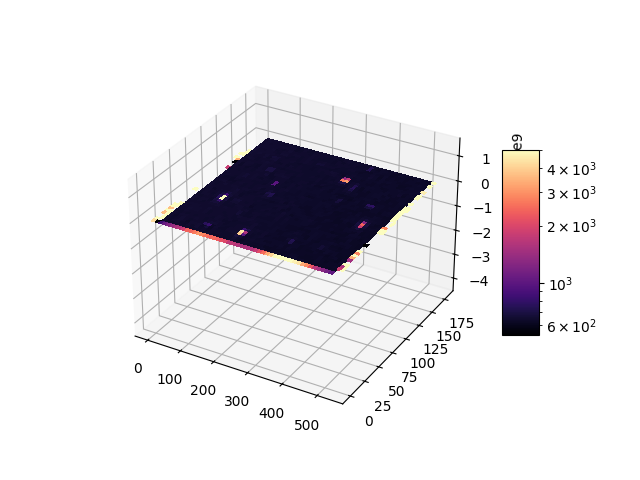

In [44]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# Plot the surface.
surf = ax.plot_surface(X, Y, science_corrected, cmap=plt.colormaps['magma'], 
                       norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                       linewidth=0, antialiased=False)

## Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

Let's make the plot again, with a few improvements:

1. We centre the 3d plot around the estimated coordinates of our target `x_target` and `y_target`;
2. we limit our plot within a radius of 15 pixels around the centre of the target, using the radius_plot parameter:
3. we change the vmax value to 4000 to display more details of the flux distribution over the pixels
4. I used additional keywords for the colorbar to make it smaller and thinner. Try different combinations of those keywords to check how they affect the appearance of the colorbar-



Мы создаём улучшенный 3D график, выполняя следующие шаги:

1. **Центрируем график**: Устанавливаем его вокруг предполагаемых координат целевой звезды `x_target` и `y_target`.

2. **Ограничиваем область**: Показываем только область с радиусом 15 пикселей от центра целевой звезды, используя параметр `radius_plot`.

3. **Настраиваем яркость**: Изменяем параметр `vmax` на 4000, чтобы лучше различать детали распределения потока на пикселях.

4. **Оптимизируем цветовую шкалу**: Применяем дополнительные параметры для цветовой шкалы, чтобы сделать её меньше и тоньше, пробуя разные комбинации для улучшения её внешнего вида.

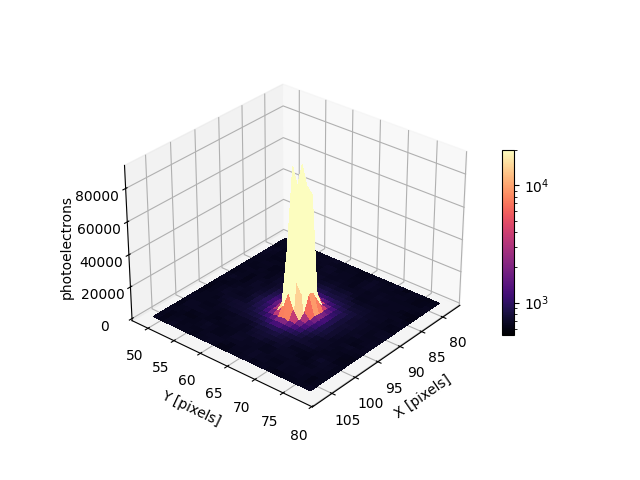

In [45]:
# Make data.

#x_target = 348
#y_target = 27

x_target = 93
y_target = 64
# Целевая звезда находится по координатам

vmax= 20000
# Максимальное значение яркости (vmax) установлено на 20000
radius_plot = 15
# График ограничен радиусом 15 пикселей вокруг целевой звезды


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Cоздаёт 3D график

# Plot the surface 
# Cтроит 3D поверхность для заданной области с центром в целевой звезде
# Используются сетки X и Y, а также данные потока science_corrected
# Цветовая карта magma и 
# логарифмическая шкала (colors.LogNorm) помогают видеть детали потока
surf = ax.plot_surface(X[y_target-radius_plot:y_target+radius_plot, x_target-radius_plot:x_target+radius_plot],
                       Y[y_target-radius_plot:y_target+radius_plot, x_target-radius_plot:x_target+radius_plot],
                       science_corrected[y_target-radius_plot:y_target+radius_plot, x_target-radius_plot:x_target+radius_plot],
                       cmap=plt.colormaps['magma'], norm=colors.LogNorm(vmin=vmin, vmax=vmax),
                       linewidth=0, antialiased=False)

# Force rotation of the plot to get the numbers on the left side
# You can get the azimuth and elevation of the observer on the lower part of the plot
# when rotating the image
ax.azim = 40 # value in degree
ax.elev = 30 # value in degree

ax.set_xlabel('X [pixels]')
ax.set_ylabel('Y [pixels]')

# Fix the orientation fo the Z label
ax.zaxis.set_rotate_label(False)  # disable automatic rotation
ax.set_zlabel('photoelectrons', rotation=90)

## Add a color bar which maps values to colors
fig.colorbar(surf, shrink=0.5, aspect=15, ticks=[10, 100, 1000, 10000, 100000])

plt.show()

3D график был построен, чтобы визуализировать распределение потока вокруг целевой звезды

Это помогает:

1. **Понять распределение яркости:** График показывает, где свет от звезды наиболее сконцентрирован и как он уменьшается с расстоянием

2. **Оценить радиус значительности потока:** Позволяет яснее определить, на каком расстоянии от центра звезды поток становится незначительным

3. **Анализировать данные:** Визуализация помогает выявлять любые аномалии или особенности в данных, такие как неоднородности потока


The shape of my target star is quite regular, but this is just a coincidence

**Defocusing the telescope** is indeed a common technique to *avoid saturation* when performing time-series photometry of bright stars

Without defocusing, you may reach saturation in a time shorter than the shortest exposure time the camera's shutter allows. 

The side effect of defocusing is a decrease in the image quality of the telescope, which, however, is not relevant when performing aperture photometry. However, it would be highly detrimental in PSF photometry, where you try to fit the shape of the star on the detector with an analytical or empirical function. For example, check this document on ESO website and references therein.


Этот текст объясняет, почему для фотометрии ярких звёзд часто применяется дефокусировка телескопа:

1. **Избегание насыщения**: Дефокусировка позволяет избежать насыщения, которое может произойти, если телескоп направлен на яркую звезду. Это важно для фотометрии, так как при насыщении данные могут быть потеряны.

2. **Кратко об ущербе от дефокусировки**: Хотя дефокусировка снижает качество изображения, это не критично для апертурной фотометрии, где важен общий поток света, а не его распределение.

3. **Влияние на PSF фотометрию**: Для фотометрии с использованием функции рассеяния точки (PSF) дефокусировка может быть проблемной, так как тут важна точная форма звезды.

Таким образом, дефокусировка полезна для измерения яркости, но может усложнять анализ формы звезды.

Зачем использовать `numpy.meshgrid` для создания двумерных массивов координат пикселей?

1. **Цель**: Рассчитать расстояние от каждого пикселя до фотометрического центра звезды
Это важно для измерения потока звезды и выделения фонового света

2. **Преимущества `meshgrid`**:
   - Создаёт двумерные координатные массивы, что упрощает вычисление расстояний
   - Удобно для выполнения массовых операций с использованием векторизации, что может быть более производительно

3. **Сравнение эффективности алгоритмов**:
   - Два алгоритма сравниваются, где один использует `meshgrid`
   - Использование `time` из стандартной библиотеки Python позволяет замерить и сравнить время выполнения каждого алгоритма


Define a way to measure the performances of our algorithms

We will use the Python standard library time for this task. 

Specifically, the function `time.time()` reports the number of seconds passed since January 1, 1970, 00:00:00 (UTC)

This information alone is not very useful, 

but if we store the times **before** and **after running** our algorithm,
difference will tell us the time spent by the algorithm in performing the computation

In [46]:
import time

t0 = time.time()

print('Seconds passed since January 1, 1970, 00:00:00 (UTC): {0:.4f}'.format(t0))

t1 = time.time()

delta_time = t1 - t0
print('Time spent to print the previous information: {0:f} seconds'.format(delta_time))

Seconds passed since January 1, 1970, 00:00:00 (UTC): 1739195972.7551
Time spent to print the previous information: 0.000054 seconds


#### The first algorithm

The first approach would be to **iterate over each pixel** and compute its **distance from the star**

Specifically, for each value of the `x` coordinate, we go through all the values of the `y` coordinate and store the result of the computation in an array with the same shape as our reference frame.

In [47]:
t0 = time.time()
rr_method01 = np.zeros_like(science_corrected)

for yi in range(0,np.shape(science_corrected)[0]):
    for xi in range (0, np.shape(science_corrected)[1]):
        rr_method01[yi, xi] =  np.sqrt((xi-x_target)**2 + (yi-y_target)**2)

t1 = time.time()

total_method01 = t1-t0
print('Time required by the first method: {0:f} seconds'.format(total_method01))

Time required by the first method: 0.121091 seconds


#### In the second algorithm, 

we again compute the X and Y 2D arrays through meshgrid 

As these two arrays already contain the `x` and `y`coordinates of each pixel, and the two arrays have the same shape as our science frame, the computation of the distance from the target star is immediate

Additionally, we divide our benchmarking into two steps: 

1. as all the images have the same shape, the step involving meshgrid will be performed only once at the beginning of our analysis, so its computation time will contribute only once to the total time of execution, regardless the number of images
2. The step where the distance from the target is computed will constitute the major contributor to the time of execution of our code

______________________

1. **Создание массивов X и Y**:
   - Используется `meshgrid` для создания двумерных массивов координат X и Y пикселей.
   - Эти массивы позволяют быстро вычислять расстояние от каждого пикселя до целевой звезды.

2. **Оптимизация производительности**:
   - Поскольку все изображения имеют одинаковую форму, шаг с `meshgrid` выполняется один раз в начале, что снижает общие временные затраты.
   - Основное время выполнения кода занимает расчет расстояний от пикселей до целевой звезды.

Таким образом, использование `meshgrid` упрощает и ускоряет вычисления в астрономических данных.

In [48]:
t0 = time.time()

X_axis = np.arange(0, xlen, 1)
Y_axis = np.arange(0, ylen, 1)
X, Y = np.meshgrid(X_axis, Y_axis)

t1 = time.time()

rr_method02 = np.sqrt((X-x_target)**2 + (Y-y_target)**2)

t2 = time.time()

prepare_method02 = t1-t0
total_method02 = t2-t1
print('Time required to set up the second algorithm: {0:f} seconds'.format(prepare_method02))
print('Time required by second algorithm:            {0:f} seconds'.format(total_method02))



Time required to set up the second algorithm: 0.000777 seconds
Time required by second algorithm:            0.000499 seconds


In [49]:
print('Algorithm using meshgrid is {0:.0f} times faster'.format(total_method01/total_method02))

Algorithm using meshgrid is 243 times faster


### Centroid algorithm

1. There are **many ways** to determine the **centre of a distribution** 
We could use 
- partial derivatives, 
- fit for a function representative of our distribution, 
- employ an empirical mode based on a subsample of observations, 
- or use a machine learning approach... 
[we select the best solution if we think about our goals and requirements] 

We need:

1. **a fast algorithm**, as it has to run several times on hundreds of images
2. **a robust algorithm**, i.e., it reaches convergences regardless of the initial conditions and perturbations of the initial conditions
3. **a simple algorithm** that can work without any prior knowledge of the Point Spread Function of the instrument, as the telescope defocusing will change night by 

##### We are going to use **the weighted centroid**. 

We weigh the coordinates of each pixel $x_i, y_i$ according to the flux collected by that pixel $F_i$. 

We compute the average over the pixels within a distance *inner_radius* from the center of the target. Following the definition of the weighted average, the average of each coordinate is equal to the weighted sums $\sum x_i F_i$ and $\sum y_i F_i$ divided by the sum of the weights, i.e., the total flux within the *inner radius* $F = \sum F_i$


The inner radius must be large enough to include all the flux coming from the star, and some sky background as well. Don't be greedy with this value! Its value in pixel is stored in the inner_radius variable. We will come back later to the meaning of this parameter.

You have already seen the weighted average in the past, most likely using the inverse of the square of the errors as weights. Here, you are using the same tool, with just the flux as weights
______________
1. **Разные подходы**:
   - Существуют различные методы определения центра, такие как использование производных, подгонка функции, эмпирические методы или машинное обучение

2. **Требования к алгоритму**:
   - **Быстрота**: Оперативное выполнение на сотнях изображений
   - **Надежность**: Способность сходиться к решению вне зависимости от начальных условий
   - **Простота**: Работа без предварительных знаний о функции рассеяния точки, поскольку телескоп может изменяться между наблюдениями

3. **Взвешенный центроид**:
   - Для определения центра используется взвешенное среднее, где весами служат потоки на каждом пикселе
   - Координаты пикселей взвешиваются согласно собранному свету, с вычислением среднего значения для пикселей в пределах определённого радиуса

Определение **взвешенного центроида** включает следующие шаги: **Цель**: Найти "среднее" положение звезды на изображении, учитывать разные яркости в разных точках.

   1. **Взвешивание координат**:
      - Каждая координата пикселя $x_i, y_i$ взвешивается в соответствии с потоком света $F_i$, который она получает
      - Это значит, что яркие участки сильнее влияют на расчет среднего положения

   2. **Расчет среднего**:
      - Суммируйте произведения координат на поток: $\sum x_i F_i$ и $\sum y_i F_i$
      - Разделите эти суммы на общий поток $F = \sum F_i$ в пределах заданного радиуса (*inner_radius*) от центра звезды

   3. **Преимущество**:
      - Метод позволяет учитывать влияния всех пикселей в заданной области, учитывая, что более яркие пиксели оказывают бóльшее влияние на итоговую позицию

      Конечно! Вот пример на упрощённой сетке:

   ##### Исходные данные:

   Предположим, у нас есть 3 пикселя с координатами и потоками:

   - Пиксель 1: $(x_1 = 1, y_1 = 1)$, поток $F_1 = 10$
   - Пиксель 2: $(x_2 = 2, y_2 = 2)$, поток $F_2 = 20$
   - Пиксель 3: $(x_3 = 3, y_3 = 3)$, поток $F_3 = 30$

   ##### Вычисление взвешенного центроида:

   1. **Взвешенные суммы для X и Y**:
      - $\text{Сумма}_x = (x_1 \cdot F_1) + (x_2 \cdot F_2) + (x_3 \cdot F_3)$ 
      - $\text{Сумма}_x = (1 \cdot 10) + (2 \cdot 20) + (3 \cdot 30) = 140$

      - $\text{Сумма}_y = (y_1 \cdot F_1) + (y_2 \cdot F_2) + (y_3 \cdot F_3)$ 
      - $\text{Сумма}_y = (1 \cdot 10) + (2 \cdot 20) + (3 \cdot 30) = 140$

   2. **Общий поток**:
      - $F = F_1 + F_2 + F_3 = 10 + 20 + 30 = 60$

   3. **Взвешенные средние для X и Y**:
      - $\text{Среднее}_x = \frac{\text{Сумма}_x}{F} = \frac{140}{60} \approx 2.33$
      - $\text{Среднее}_y = \frac{\text{Сумма}_y}{F} = \frac{140}{60} \approx 2.33$

##### Результат:

- Взвешенный центроид находится в координатах \((2.33, 2.33)\).

Таким образом, более яркие пиксели ближе к центру оказывают большее влияние на положение центроида.

   
!Таким образом, этот подход даёт более точное положение звезды, чем простое усреднение координат, поскольку учитывает яркость каждого пикселя

4. **inner_radius**:
   - Радиус должен быть достаточен, чтобы охватывать весь поток от звезды и немного фона
   - Избегайте слишком большого выбора, чтобы не захватить лишний шум

Метод взвешенного центроида позволяет точнее определить центр звезды, учитывая свет, собранный каждым пикселем, без необходимости сложных вычислений

In [50]:
#Centroid algorithm

# Initial coordinates of the target
# x_target = 348
# y_target = 27

x_target = 93
y_target = 64

# Value for the inner radius
inner_radius = 11

# Computing again the meshgrid arrays 
ylen, xlen = np.shape(science_corrected)
X_axis = np.arange(0, xlen, 1)
Y_axis = np.arange(0, ylen, 1)
X, Y = np.meshgrid(X_axis, Y_axis)

# 2D array with the distance of each pixel from the target star 
target_distance = np.sqrt((X-x_target)**2 + (Y-y_target)**2)

# Selection of the pixels within the inner radius
annulus_sel = (target_distance < inner_radius)

# Weighted sum of coordinates
weighted_X = np.sum(science_corrected[annulus_sel]*X[annulus_sel])
weighted_Y = np.sum(science_corrected[annulus_sel]*Y[annulus_sel])

# Sum of the weights
total_flux = np.sum(science_corrected[annulus_sel])

# Refined determination of coordinates
x_target_refined = weighted_X/total_flux
y_target_refined = weighted_Y/total_flux

print('Initial coordinates  x: {0:5.2f}   y: {1:5.2f}'.format(x_target, y_target))
print('Refined coordinates  x: {0:5.2f}   y: {1:5.2f}'.format(x_target_refined, y_target_refined))

Initial coordinates  x: 93.00   y: 64.00
Refined coordinates  x: 92.68   y: 64.21


Note: Ensure the inner annulus fully includes the star's flux, with some background around it. 

Below, you can find an example where the vmax value has been set to twice the background level to highlight the boundaries of the star. An example of a good inner radius (white line) and a bad inner radius (yellow line) are shown


1. **Цель**: Убедиться, что внутренний annulus полностью включает свет от звезды, а также немного окружающего фона

2. **Настройка `vmax`**:
   - `vmax` устанавливается в два раза выше уровня фона, чтобы лучше выделить границы звезды.

3. **Пример правильного радиуса**:
   - **Хороший радиус** (обозначен белой линией) полностью охватывает свет звезды и часть фона.
   - **Плохой радиус** (обозначен жёлтой линией) не полностью охватывает свет звезды или слишком мал, чтобы включить достаточное количество фона.

Это важно для правильного измерения звёздного потока и исключения влияния фонового света.

vmin:  531.8    vmax: 66798.9


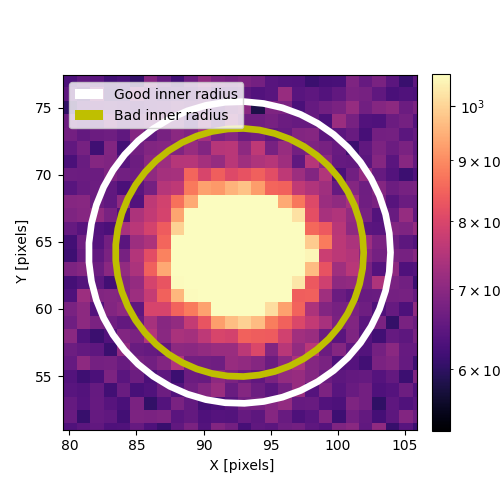

In [51]:
def make_circle_around_star(x_pos, y_pos, radius, thickness=0.5, label='', color='w', alpha=1.):
    from matplotlib.patches import Circle

    n, radii = 50, [radius, radius+thickness]
    theta = np.linspace(0, 2*np.pi, n, endpoint=True)
    xs = np.outer(radii, np.cos(theta))
    ys = np.outer(radii, np.sin(theta))
    
    # in order to have a closed area, the circles
    # should be traversed in opposite directions
    xs[1,:] = xs[1,::-1]
    ys[1,:] = ys[1,::-1]
    
    ax.fill(np.ravel(xs)+x_pos, np.ravel(ys)+y_pos, edgecolor=None, facecolor=color, alpha=alpha, label=label)


from matplotlib import colors 

vmin = np.amin(science_corrected[:,100:400])
vmax = np.amax(science_corrected[:,100:400])
print('vmin:  {0:.1f}    vmax: {1:.1f}'.format(vmin, vmax))
vmax = 2*vmin

fig, ax = plt.subplots(1, figsize=(5,5))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['magma'], norm=colors.LogNorm(vmin=vmin, vmax=vmax), origin='lower')
plt.colorbar(im1,ax=ax, fraction=0.046, pad=0.04)

# Cut the plot around the target star, with some margin with respect to the inner radius
plt.xlim(x_target_refined-inner_radius*1.2, x_target_refined+inner_radius*1.2)
plt.ylim(y_target_refined-inner_radius*1.2, y_target_refined+inner_radius*1.2)

make_circle_around_star(x_target_refined, y_target_refined, inner_radius, label='Good inner radius')
make_circle_around_star(x_target_refined, y_target_refined, 9, color='y', label='Bad inner radius')

plt.xlabel(' X [pixels]')
plt.ylabel(' Y [pixels]')
plt.legend(loc='upper left')
plt.show()

* Our algorithm for a precis (точный) and robust(надежный) determination of the photocenter requires an initial guess, also called starting point 

* This situation is not uncommon: the choice of a starting point is considered the major pitfall (ловушкой) of Markov Chain Monte Carlo (MCMC) algorithms

* For complex analysis, you may need a specific algorithm to identify your starting point

* In this case, the identification is pretty straightforward -- only need to find the approximate centre of a big circle using your mouse 

However, we may wonder how much a specific choice of the starting point may affect the output of our algorithm (another problem in common with MCMC)
    
    Suppose our starting point is quite far from the real (unknown) value but still in a reasonable range (i.e., the starting point is not in an empty region of the sky). 
    In that case, it is reasonable to think that the centroid algorithm will bring us closer to the real value, thus providing a better starting point for another iteration of the algorithm. 
    In other words, we can check how many iterations our algorithms need to determine the centroid with a given precision given an approximate starting point

To do so, we include our algorithm in a cycle where the new photocenter measurement is used as a starting point for the next iteration. We stop the cycle when either the maximum number of iterations is reached, or the variation in the coordinates between two consecutive iterations (percent variance) is smaller than a given threshold ( e.g., 0.1%)

__________________________
Как найти точный фотометрический центр звезды с помощью итеративного алгоритма?
(Это помогает точно определить центр звезды даже при неточной начальной оценке)

1. **Начальная точка**: Алгоритм требует начального приближения, чтобы начать определение центра. Это аналогично MCMC-алгоритмам, где выбор начальной точки критически важен

2. **Выбор начальной точки**: В простых случаях её можно определить вручную, выбрав приблизительный центр звезды

3. **Итерации**: Алгоритм улучшает начальную точку, постепенно приближаясь к истинному центру звезды через несколько итераций

4. **Условия остановки**: Процесс останавливается, когда достигнуто максимальное число итераций или когда изменения в координатах становятся меньше установленного порога (например, 0.1%)



In [52]:
#Centroid algorithm

# Initial coordinates of the target
x_target_initial = 93
y_target_initial = 64

maximum_number_of_iterations = 30
# Печатает начальные координаты

# Computing again the meshgrid arrays 
#ylen, xlen = np.shape(science_corrected)
#X_axis = np.arange(0, xlen, 1)
#Y_axis = np.arange(0, ylen, 1)
#X, Y = np.meshgrid(X_axis, Y_axis)

print('Initial coordinates  x: {0:5.2f}   y: {1:5.2f}'.format(x_target_initial, y_target_initial))

for i_iter in range(0, maximum_number_of_iterations):
    #Запускает цикл для итераций, максимальное количество которых равно 30

    if i_iter == 0:
        # first iteration: Если это первая итерация, используйте начальные координаты
        x_target_previous = x_target_initial
        y_target_previous = y_target_initial
    else:
        # using the previous result as starting point
        x_target_previous = x_target_refined
        y_target_previous = y_target_refined
        # Для последующих итераций используйте уточнённые координаты из предыдущей итерации

    # 2D array with the distance of each pixel from the target star 
    # Вычисляет расстояние от каждого пикселя до предыдущего центрального положения звезды
    target_distance = np.sqrt((X-x_target_previous)**2 + (Y-y_target_previous)**2)

    # Selection of the pixels within the inner radius
    # Выбирает пиксели, находящиеся в пределах внутреннего радиуса от центра звезды
    annulus_sel = (target_distance < inner_radius)
    
    # Weighted sum of coordinates: Вычисляет взвешенные суммы координат X и Y
    weighted_X = np.sum(science_corrected[annulus_sel]*X[annulus_sel])
    weighted_Y = np.sum(science_corrected[annulus_sel]*Y[annulus_sel])
    
    # Sum of the weights: Суммирует световой поток (веса) для выбранных пикселей
    total_flux = np.sum(science_corrected[annulus_sel])

    # Refined determination of coordinates: Определяет уточненные координаты центра, используя взвешенные суммы
    x_target_refined = weighted_X/total_flux
    y_target_refined = weighted_Y/total_flux
    
    # Рассчитывает процентное изменение координат от предыдущих значений
    percent_variance_x = (x_target_refined-x_target_previous)/(x_target_previous) * 100.
    percent_variance_y = (y_target_refined-y_target_previous)/(y_target_previous) * 100.
    
    #Печатает результаты текущей итерации, включая уточненные координаты и процентные изменения
    print('    Iteration {0:3d}   x: {1:.3f} ({2:.2f}%)  y: {3:.3f} ({4:.2f}%)'.format(i_iter,
                                                                                   x_target_refined, 
                                                                                   percent_variance_x,
                                                                                   y_target_refined,
                                                                                   percent_variance_y))
          
    # exit condition: both percent variance are smaller than 0.1%
    # Завершает цикл, если процентные изменения по обеим координатам меньше 0.1%
    if np.abs(percent_variance_x)<0.1 and  np.abs(percent_variance_y)<0.1:
          break

print('Refined coordinates  x: {0:5.2f}   y: {1:5.2f}'.format(x_target_refined, y_target_refined))

Initial coordinates  x: 93.00   y: 64.00
    Iteration   0   x: 92.684 (-0.34%)  y: 64.211 (0.33%)
    Iteration   1   x: 92.612 (-0.08%)  y: 64.267 (0.09%)
Refined coordinates  x: 92.61   y: 64.27


vmin:  531.8    vmax: 66798.9


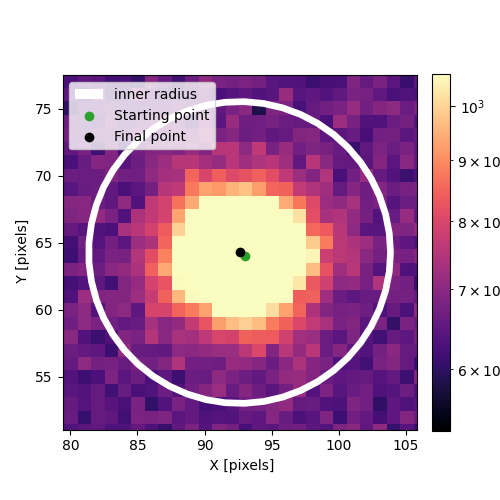

In [53]:
vmin = np.amin(science_corrected[:,100:400])
vmax = np.amax(science_corrected[:,100:400])
print('vmin:  {0:.1f}    vmax: {1:.1f}'.format(vmin, vmax))
vmax = 2*vmin

fig, ax = plt.subplots(1, figsize=(5,5))
im1 = plt.imshow(science_corrected, cmap=plt.colormaps['magma'], norm=colors.LogNorm(vmin=vmin, vmax=vmax), origin='lower')
plt.colorbar(im1,ax=ax, fraction=0.046, pad=0.04)

# Cut the plot around the target star, with some margin with respect to the inner radius
plt.xlim(x_target_refined-inner_radius*1.2, x_target_refined+inner_radius*1.2)
plt.ylim(y_target_refined-inner_radius*1.2, y_target_refined+inner_radius*1.2)

make_circle_around_star(x_target_refined, y_target_refined, inner_radius, label='inner radius')

ax.scatter(x_target_initial, y_target_initial, c='C2', label='Starting point')
ax.scatter(x_target_refined, y_target_refined, c='k', label='Final point')

plt.xlabel(' X [pixels]')
plt.ylabel(' Y [pixels]')
plt.legend(loc='upper left')
plt.show()

! Even in a case or a wildly wrong guess, our calgorithm converges to the correct position in just a few steps


#### Extra: measuring the Full Width Half Maximum of our centroid
We want to determine **how large** is our star, not just the position of the photocenter 
Knowing the scale of a pixel, we can convert this information onto the measured seeing

Fpor more accurtate measurements, 
first, we should remove the sky background 

Except for this step, the algorithm would be identical
_____________
"Measured seeing" — это оценка углового размера звезды, основанная на её видимой ширине на изображении. Seeing определяется как размытие звезды, вызванное атмосферными условиями, и выражается в угловых секундах.

Хороший seeing указывает на чёткие изображения с небольшим размитием, а плохой — на более размытые. Измерение помогает астрономам оценивать качество наблюдений и учитывать атмосферные эффекты.

In [ ]:
# flux within the annulus 
# 2D array with the distance of each pixel from the target star 
target_distance = np.sqrt((X-x_target_refined)**2 + (Y-y_target_refined)**2)
# Определяется массив расстояний от каждого пикселя до центра целевой звезды 
# (x_target_refined, y_target_refined)

# Selection of the pixels within the inner radius
annulus_sel = (target_distance < inner_radius)
#Выбираются пиксели, которые находятся внутри заданного радиуса (inner_radius) от центра звезды

# We compute the sum of the total flux within the inner radius.
total_flux = np.nansum(science_corrected*annulus_sel) 
#Суммируется поток всех выбранных пикселей, игнорируя NaN значения

# We compute the sum of the flux along each axis, within the inner radius.
flux_x = np.nansum(science_corrected*annulus_sel, axis=0) 
flux_y = np.nansum(science_corrected*annulus_sel, axis=1) 
# Вычисляется сумма потока вдоль каждой оси (X и Y) в пределах выбранного радиуса

# We use the nansum function to avoid problems with the overscan region

/var/folders/3w/7g5zt5xj0jn5c1q54g2z15wc0000gq/T/ipykernel_298/2369449268.py:9: RuntimeWarning: invalid value encountered in multiply
  total_flux = np.nansum(science_corrected*annulus_sel)
/var/folders/3w/7g5zt5xj0jn5c1q54g2z15wc0000gq/T/ipykernel_298/2369449268.py:12: RuntimeWarning: invalid value encountered in multiply
  flux_x = np.nansum(science_corrected*annulus_sel, axis=0)
/var/folders/3w/7g5zt5xj0jn5c1q54g2z15wc0000gq/T/ipykernel_298/2369449268.py:13: RuntimeWarning: invalid value encountered in multiply
  flux_y = np.nansum(science_corrected*annulus_sel, axis=1)


In [ ]:
# we compute the cumulative sum along each axis, normalized to the total flux
cumulative_sum_x = np.cumsum(flux_x)/total_flux
cumulative_sum_y = np.cumsum(flux_y)/total_flux

# Вычисляется кумулятивная сумма потока вдоль каждой оси, нормализованная на общий поток, 
# чтобы оценить распределение

# Кумулятивная сумма потока вдоль каждой оси — это последовательное накопление 
# значений потока, которое показывает, как общий поток распределяется по изображению

# Кумулятивная сумма вдоль оси X:
# Вычисляется путём сложения значений потока пикселей в каждом столбце
# На каждом шаге кумулятивная сумма добавляет поток текущего пикселя к предыдущей сумме

# Нормализация на общий поток:
# Делает кумулятивную сумму относительной, чтобы она выглядела как процент от общего потока
# Это позволяет понять, какая часть общего света сосредоточена в конкретных областях



/var/folders/3w/7g5zt5xj0jn5c1q54g2z15wc0000gq/T/ipykernel_298/9186053.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


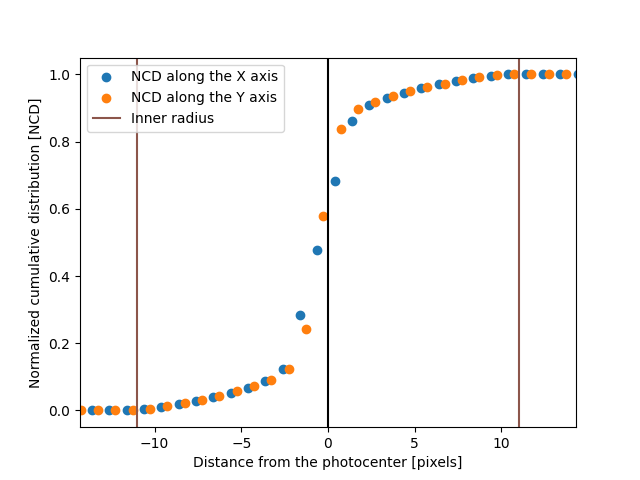

In [ ]:
# Differences in the cumulative distribution will highlight asymmetries in the star's shape

# Построение графика нормализованного кумулятивного распределения вдоль осей X и Y
# Вертикальные линии показывают центральную точку и внутренний радиус, позволяя сравнить симметрию звезды

plt.figure()
plt.scatter(X_axis-x_target_refined,cumulative_sum_x, label='NCD along the X axis')
plt.scatter(Y_axis-y_target_refined,cumulative_sum_y, label='NCD along the Y axis')
#Normalized Cumulative Distribution
plt.axvline(0, c='k')

plt.xlim(-inner_radius*1.3, inner_radius*1.3)
# Умножение на 1.3 в plt.xlim(-inner_radius*1.3, inner_radius*1.3) расширяет пределы отображаемой 
# области графика на 30% за границы радиуса, определенного как inner_radius

plt.axvline(inner_radius, c='C5', label='Inner radius') 
plt.axvline(-inner_radius, c='C5')
plt.xlabel('Distance from the photocenter [pixels]')
plt.ylabel('Normalized cumulative distribution [NCD]')
plt.legend()

plt.show()

График показывает, как кумулятивная сумма потока распределена вдоль осей X и Y относительно общего потока

### Что делает график:

1. **Горизонтальная ось**: Показывает расстояние от центра звезды (фотометрического центра) в пикселях

2. **Вертикальная ось (NCD)**: Отражает накопленный процент потока, нормированный на общий поток, от 0 до 1

3. **Анализирование асимметрии**:
   - Разница в распределении вдоль X и Y может выявить асимметрию в форме звезды
   - Равномерные распределения вдоль обеих осей говорят о симметричности

4. **Вертикальные линии**:
   - Показывают центр и внутренний радиус, помогая визуально оценить симметрию



In [ ]:
def determine_FWHM_axis(reference_axis, normalized_cumulative_distribution):
    
    NCD_index_left = np.argmin(np.abs(normalized_cumulative_distribution-0.15865))
    # Find the closest point to NCD= 0.15865 (-1 sigma)
    #NCD_index_left : Находит индекс, где нормализованное кумулятивное распределение (NCD) 
    # ближе всего к 0.15865 (что соответствует -1 сигма для нормального распределения)
    
    NCD_index_right = np.argmin(np.abs(normalized_cumulative_distribution-0.84135))
    # Find the closest point to NCD= 0.84135 (+1 sigma)
    # NCD_index_right : Находит индекс, где NCD ближе всего к 0.84135 (+1 сигма)

    p_fitted = np.polynomial.Polynomial.fit(normalized_cumulative_distribution[NCD_index_left-1: NCD_index_left+2],
                                            reference_axis[NCD_index_left-1: NCD_index_left+2],
                                            deg=2)
    # We model the NCD around the -1sgima value with a polynomial curve
    # The independet variable is actually the normalized cumulative distribution, 
    # the depedent variable is the pixel position
    # Используется полиномиальная аппроксимация второй степени (deg=2) для 
    # уточнения позиции пикселя, соответствующего -1 сигма и +1 сигма
   
    pixel_left = p_fitted(0.15865)
    # We get a more precise estimate of the pixel value corresponding to the -1sigma position
    # Уточнённая позиция пикселя для -1 сигма, полученная через аппроксимацию
    
    p_fitted = np.polynomial.Polynomial.fit(normalized_cumulative_distribution[NCD_index_right-1: NCD_index_right+2],
                                            reference_axis[NCD_index_right-1: NCD_index_right+2],
                                            deg=2)
    # We repeat the step for the 1sigma value
    # p_fitted: Это объект, представляющий полином, который аппроксимирует 
    # NCD вокруг целевых значений (-1 сигма и +1 сигма)
    
    pixel_right = p_fitted(0.84135)
    # Уточнённая позиция пикселя для +1 сигма

    print(pixel_left, pixel_right)
    
    FWHM_factor = 2 * np.sqrt(2 * np.log(2)) # = 2.35482
    # Константа для преобразования между полными и половинными ширинами в контексте нормального распределения
    FWHM = (pixel_right-pixel_left)/2. * FWHM_factor
    # Разница между pixel_right и pixel_left, умноженная на фактор корректировки, чтобы 
    # получить полную ширину на половине высоты

    return FWHM
    

In [64]:
FWHM_x = determine_FWHM_axis(X_axis, cumulative_sum_x)
FWHM_y = determine_FWHM_axis(Y_axis, cumulative_sum_y)
print('FWHM along the X axis: {0:.2f}'.format(FWHM_x)) 
print('FWHM along the X axis: {0:.2f}'.format(FWHM_y)) 

90.74049015305017 93.66546067171956
62.719226937474254 65.05185085225136
FWHM along the X axis: 3.44
FWHM along the X axis: 2.75


In [62]:
# From the fits header of the first image:
# CCDSCALE=                 0.25 / [arcsec/px] unbinned CCD camera scale
#BINX    =                    4 / Horizontal Binning factor used
#BINY    =                    4 / Vertical Binning factor used

print('Seeing along the X axis (after defocusing): {0:.2f}'.format(FWHM_x* 4*0.26)) 
print('Seeing along the Y axis (after defocusing): {0:.2f}'.format(FWHM_y* 4*0.26)) 

Seeing along the X axis (after defocusing): 3.58
Seeing along the Y axis (after defocusing): 2.86


Вычисление FWHM (Full Width Half Maximum) центроида звезды необходимо для нескольких целей:

1. **Измерение разрешения**: FWHM показывает, насколько "размыто" изображение звезды, что является индикатором разрешения телескопа и условий наблюдения.

2. **Оценка качества изображения**: Это помогает определить, насколько хорошо сфокусировано изображение. Более малое значение FWHM указывает на более резкое изображение.

3. **Калибровка инструментов**: FWHM используется для настройки и калибровки телескопов и камер, чтобы они выдавали четкие изображения.

4. **Анализ условий наблюдения**: Значение FWHM может свидетельствовать о турбулентности атмосферы (seeing), влияющей на качество наблюдений.

5. **Сравнение объектов**: Позволяет сравнивать размеры и формы различных объектов на изображении и определять их физические характеристики.


Ваши результаты показывают следующее:

1. **FWHM вдоль оси X**:
   - Значения 3.44 и 2.75 пикселя показывают вариации в ширине звезды на полувысоте вдоль этой оси. Это может свидетельствовать о неравномерности изображения или ошибках при измерении

2. **Seeing вдоль осей X и Y**:
   - Значения 3.58 (X-ось) и 2.86 (Y-ось) показывают воздействие атмосферы. Эти значения говорят о том, что изображение более размытое по X в сравнении с Y

### Выводы:

- **XX и XY FWHM отличается**: Это может свидетельствовать о проблемах в фокусировке или различиях в оптической системе телескопа
- **Сравнение FWHM и Seeing**:
  - FWHM по X (3.44 и 2.75) близко к значению "seeing" (3.58), что может указывать на то, что размытие в основном вызвано атмосферой
  - Seeing по Y меньше (2.86), что лучше согласуется с ожиданиями

Рекомендуется обратить внимание на фокусировку и проверку оборудования, чтобы минимизировать различия в показаниях.